#Perform the following operations using R/Python on the data sets:
#a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles
#b) Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions.
#c) Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Customer_Behaviour.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


a) **Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles** **bold text** **bold text**


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [ ]:
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [ ]:
sum_static= df.describe().T
sum_static["range"]= sum_static["max"]-sum_static["min"]
print(sum_static)

                 count          mean           std         min          25%  \
User ID          400.0  1.569154e+07  71658.321581  15566689.0  15626763.75   
Age              400.0  3.765500e+01     10.482877        18.0        29.75   
EstimatedSalary  400.0  6.974250e+04  34096.960282     15000.0     43000.00   
Purchased        400.0  3.575000e-01      0.479864         0.0         0.00   

                        50%         75%         max     range  
User ID          15694341.5  15750363.0  15815236.0  248547.0  
Age                    37.0        46.0        60.0      42.0  
EstimatedSalary     70000.0     88000.0    150000.0  135000.0  
Purchased               0.0         1.0         1.0       1.0  


# **Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions.**

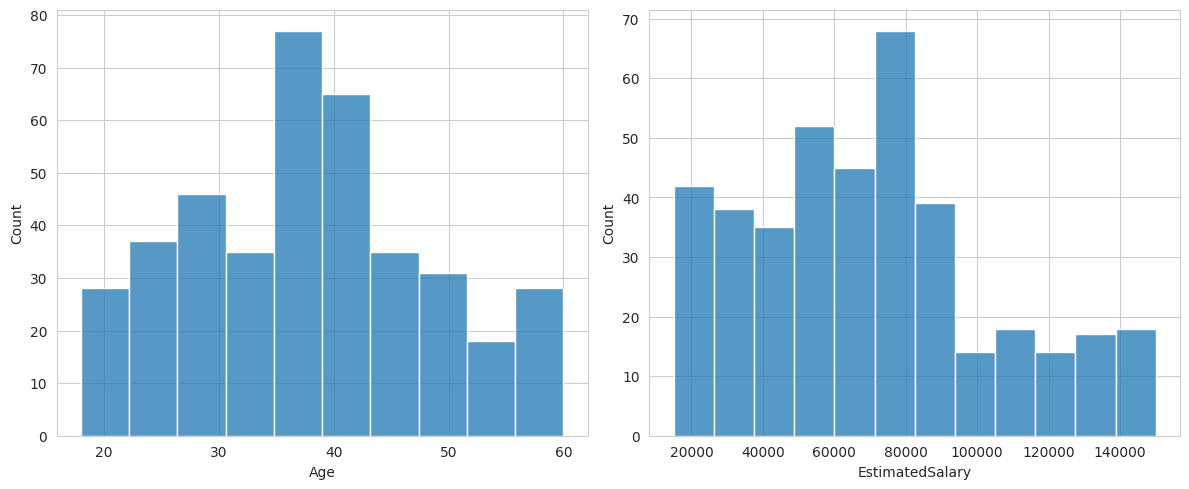

In [ ]:
sn.set_style("whitegrid")
numerical_feature=["Age","EstimatedSalary"]

fig,axes=plt.subplots(1,2,figsize=(12,5))

for i, col in enumerate(numerical_feature):
    sn.histplot(data=df,x=col,ax=axes[i])
plt.tight_layout()
plt.show()

<ipython-input-17-232f3648144e>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


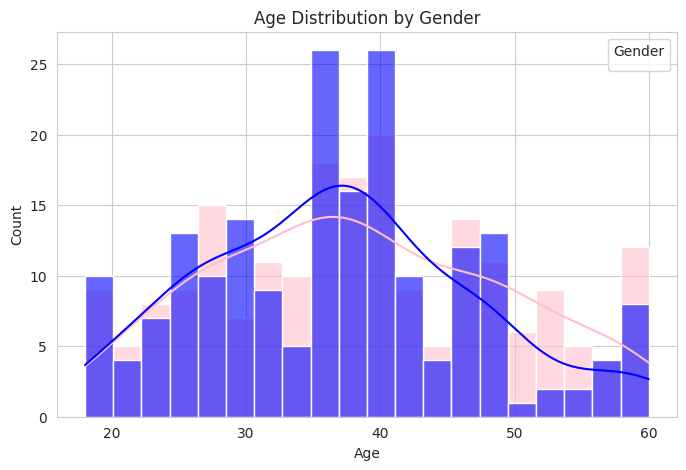

In [ ]:
# Plot histogram to compare Male vs Female distributions
plt.figure(figsize=(8, 5))
sn.histplot(df, x="Age", hue="Gender", bins=20, kde=True, palette={"Male": "blue", "Female": "pink"}, alpha=0.6)

plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


**Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)**


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_cleaned= df.drop(columns=["User ID"]) # droped because not needed
# label encoder for female  and mail
label_encoder = LabelEncoder()
df_cleaned["Gender"] = label_encoder.fit_transform(df_cleaned["Gender"]) #Male=1, Female=0
# standardiz numerical feature
scaler = StandardScaler()
df_cleaned[["Age", "EstimatedSalary"]] = scaler.fit_transform(df_cleaned[["Age", "EstimatedSalary"]])

print(df_cleaned.head())

   Gender       Age  EstimatedSalary  Purchased
0       1 -1.781797        -1.490046          0
1       1 -0.253587        -1.460681          0
2       0 -1.113206        -0.785290          0
3       0 -1.017692        -0.374182          0
4       1 -1.781797         0.183751          0


**Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X=df_cleaned.drop(columns=["Purchased"])
Y=df_cleaned["Purchased"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (320, 3), Test Set: (80, 3)


**Train a Classification Model (Logistic Regression)**

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

Predict for a New Customer
If a 30-year-old female with a salary of 60,000 wants to be predicted:

In [ ]:
# Example new customer (Gender: Female, Age: 30, Salary: 60000)
new_customer = pd.DataFrame([[0, 30, 60000]], columns=["Gender", "Age", "EstimatedSalary"])

# Standardize Age and Salary (using the same scaler from training)
new_customer[["Age", "EstimatedSalary"]] = scaler.transform(new_customer[["Age", "EstimatedSalary"]])

# Predict purchase decision
purchase_prediction = model.predict(new_customer)

# Show result
print("Prediction (1=Will Purchase, 0=Will Not Purchase):", purchase_prediction[0])


Prediction (1=Will Purchase, 0=Will Not Purchase): 0
